## **Homework 1** Problem 1

In [3]:
%matplotlib inline

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Load MNIST dataset from your Google Drive. 

In [5]:
from scipy.io import loadmat
mnist = loadmat('mnist.mat')
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

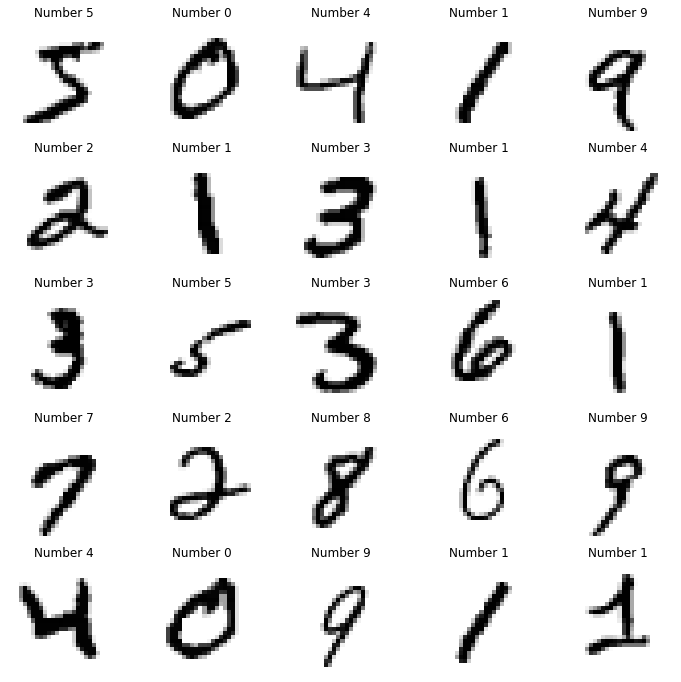

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [ ]:
# TODO: implement PCA

**Please type your answers for the discussion questions here.**

## **Homework 1** Problem 2

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [ ]:
def knn(traindata, trainlabels, testdata, k=1):
  # TODO: implement k-NN
  return preds

Evaluate the performance by classification accuracy on validation set with different number of training data.

In [ ]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]

for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)

  # TODO: run k-NN using raw training data


In [ ]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]

for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)

  # TODO: run k-NN using pca data
  
  # TODO: evaluate classification accuracy

Draw the learning curve.

Evaluate the classification accuracy with different hyperparamter $k$.

**Please type your answers for the discussion questions here.**

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

In [ ]:
n_cluster = 10

# TODO: fit kmeans model

# TODO: show real digit distribution in each cluster

# TODO: evaluate accuracy


Improve the clustering performance by using different $k$ and adding splitting and grouping strategies.

Infer $k$-Means results on the testing set. Evaluate performance.

**Please type your answers for the discussion questions here.**

### (c) Discussion

**Please type your answers for the discussion questions here.**